# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [58]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [59]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum = train_error_acum / X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                val_error_acum += error # Aquí se acumula el error de validación

            # Calcular el error promedio de validación por epoch
            val_error_acum = val_error_acum / X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()


In [60]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 6000
N_inputs = 2
train_size = 0.915
N_validation = int((1 - train_size) * N_samples)

# Generar datos de entrada X con todas las combinaciones posibles
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X_train = np.tile(X_train, (N_samples // 4, 1))

# Generar datos de salida Y para la puerta AND
Y_train = np.array([0, 0, 0, 1])
Y_train = np.tile(Y_train, N_samples // 4)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, train_size=train_size, random_state=42)

# Visualizar algunas muestras
print("X_data (primeras 5 muestras):")
print(X_train[:5])

print("Y_data (primeras 5 muestras):")
print(Y_train[:5])

print(f'Tamaño del array X_train: {X_train.shape}')
print(f'Tamaño del array Y_train: {Y_train.shape}')

X_data (primeras 5 muestras):
[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]
Y_data (primeras 5 muestras):
[0 1 1 1 0]
Tamaño del array X_train: (5490, 2)
Tamaño del array Y_train: (5490,)


In [61]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [62]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 0.7007147057019384
Prediction: 1


In [63]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion

for i in range(X_validation.shape[0]):
    inputs = X_validation[i]
    threshold =  perceptron_and.predict(inputs)
    prediction = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions.append(prediction)

print(predictions)

threshold = 0.5

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

epoch: 0 | train error: 0.03630004949360739 | val error: 0.005476559001127002
epoch: 10 | train error: 6.299168971026227e-05 | val error: 5.729224007108324e-05
epoch: 20 | train error: 1.649346298064358e-05 | val error: 1.57443964601805e-05
epoch: 30 | train error: 7.438437443355614e-06 | val error: 7.216012202882182e-06
epoch: 40 | train error: 4.213540572325052e-06 | val error: 4.120529848799955e-06
epoch: 50 | train error: 2.707632753990752e-06 | val error: 2.6606375117273457e-06
epoch: 60 | train error: 1.8852444735844665e-06 | val error: 1.8584682610164263e-06
epoch: 70 | train error: 1.3876107585496104e-06 | val error: 1.3710337035588226e-06
epoch: 80 | train error: 1.0638128868114197e-06 | val error: 1.0529068252972916e-06
epoch: 90 | train error: 8.414010691108021e-07 | val error: 8.338852129362379e-07


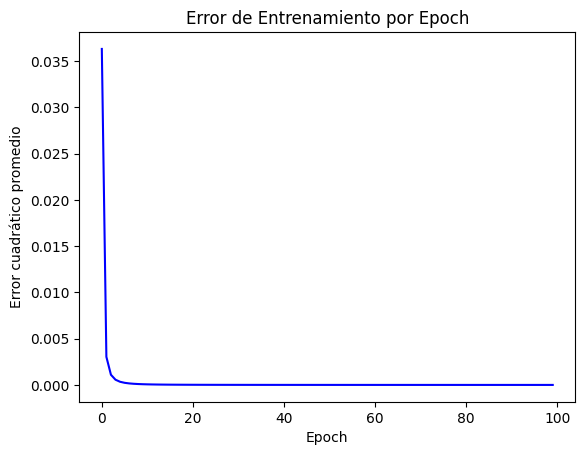

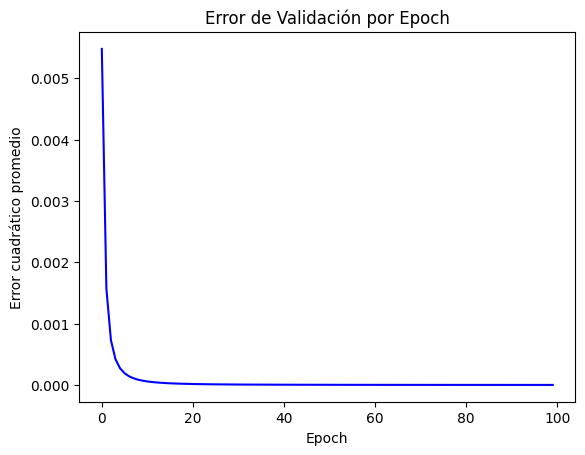

In [64]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [65]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4
th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 7.00072447756545e-10
Prediction: 0


In [66]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions_validation = []
## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion
for i in range(X_validation.shape[0]):
    inputs = X_validation[i]
    threshold_val =  perceptron_and.predict(inputs)
    prediction_val = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions_validation.append(prediction_val)
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[387   0]
 [123   0]]


In [67]:
# Evaluamos cómo funciona el modelo en el set de test
N_samples = 500

## Generar el set de test (de forma similar al de validación)
X_test = np.tile([[0, 0], [0, 1], [1, 0], [1, 1]], (N_samples // 4, 1))
Y_test = np.tile([0, 0, 0, 1], N_samples // 4)
## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
predictions_test=[]

for i in range(X_test.shape[0]):
    inputs = X_test[i]
    threshold_test =  perceptron_and.predict(inputs)
    prediction_test = (prob > threshold).astype(int)  # Aplicar umbral y convertir a entero
    predictions_test.append(prediction_test)

# Calcula la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions_test)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_test)

Matriz de Confusión:
[[375   0]
 [125   0]]
